In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<AxesSubplot:>

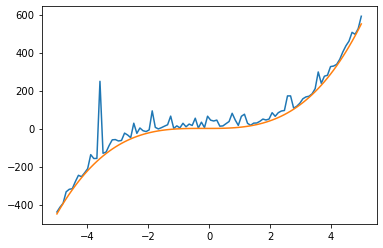

In [41]:

class Polynomial():

    def __init__(self, coeficents, degrees=None) -> None:
        if degrees == None:
            self.degree = list(reversed(range(len(coeficents))))
        else:
            self.degree = degrees
        self.coeficents = coeficents

    def predict(self, x):
        return sum([self.coeficents[i]*x**self.degree[i] for i in range(len(self.coeficents))])

p = Polynomial([1, 2, 4],[0, 2, 3])
t = np.linspace(start=-5, stop=5, num=100)
y = p.predict(t)

mu, sigma = 3., 1. # mean and standard deviation
noise = np.random.lognormal(mean=mu, sigma=sigma, size=len(y))
# noise = np.random.normal(scale=50, size=len(y))

noisy_y = y + noise

sns.lineplot(x=t, y=noisy_y)
sns.lineplot(x=t, y=y)

<AxesSubplot:>

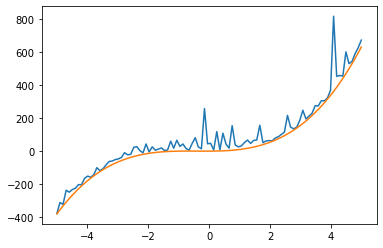

In [49]:

p1, p2 = Polynomial([1, 2, 4],[0, 2, 3]), Polynomial([0, 1, 3],[2, 1, 2])
t = np.linspace(start=-5, stop=5, num=100)
y1, y2 = p1.predict(t), p2.predict(t)
y = y1 + y2

mu, sigma = 3., 1. # mean and standard deviation
noise = np.random.lognormal(mean=mu, sigma=sigma, size=len(y))
# noise = np.random.normal(scale=50, size=len(y))

noisy_y = y + noise

sns.lineplot(x=t, y=noisy_y)
sns.lineplot(x=t, y=y)

In [46]:
from scipy.optimize import curve_fit

# get xdata, ydata, and desired degree d from user
d = 10

def arbitrary_poly(x, *params):
    return sum([p*(x**i) for i, p in enumerate(params)])

popt, pcov = curve_fit(arbitrary_poly, t, y, p0=[1]*(d+1))

In [48]:
# popt
# pcov

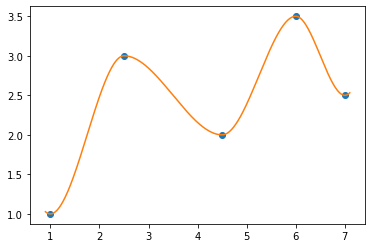

In [3]:
import numpy as np
from scipy.interpolate import CubicHermiteSpline

x = np.array([1, 2.5, 4.5, 6, 7])  # x coordinates of turning points
y = np.array([1, 3, 2, 3.5, 2.5])  # y coordinates of turning points
p = CubicHermiteSpline(x=x, y=y, dydx=np.zeros_like(y))  # interpolator   
plt.plot(x, y, 'o')
xx = np.linspace(0.9, 7.1, 1000)
plt.plot(xx, p(xx))

